# Personalized Data Science Career Advice
## DSCI-403
## Hayden Sather

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from get_jobs import *
from graph_values import *
from helper_funcs import *
from estimations import *

%matplotlib inline

## Get dataframe of jobs from text file

In [2]:
jobs_df = get_df()

## Perform main preprocessing

In [3]:
# Fix states
location_to_state(jobs_df)

# Fix sizes
get_estimate_values(jobs_df, "Size")
get_estimate_values(jobs_df, "Salary Estimate")

# Drop unneeded cols
drop_other_cols(jobs_df)

## Data exploration

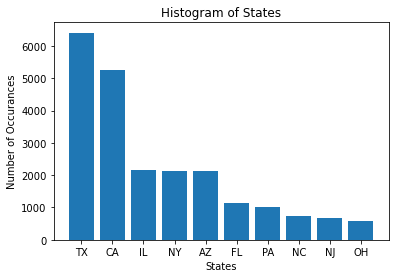

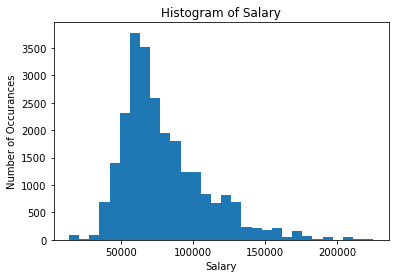

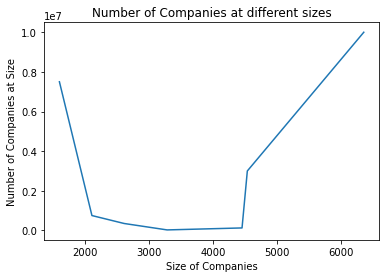

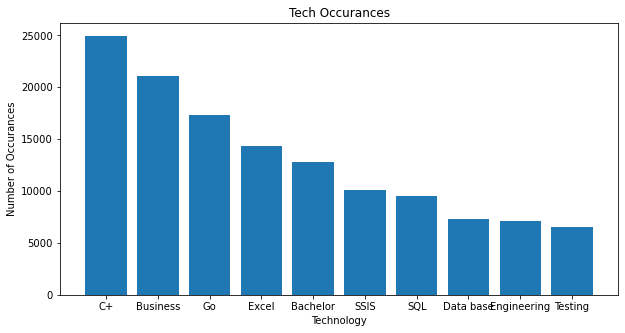

In [4]:
states_bar(jobs_df)
salary_hist(jobs_df)
size_graph(jobs_df)
tech_occurs(jobs_df)

## Final preprocessing

In [5]:
# Turn States to dummies
jobs_df = pd.get_dummies(jobs_df, columns=["State"])

## Hyperparameter Search

In [6]:
X_train, X_test, y_train, y_test, X, y = train_test_split_jobs(jobs_df)

In [7]:
perform_grid_search = True
if perform_grid_search:
    cv_regr = RandomForestRegressor()
    # parameters = {"max_depth": range(30, 40),
    #               "n_estimators": range(40, 50)}
    parameters = {"max_depth": range(140, 161, 5),
                  "n_estimators": range(180, 261, 10)}
    clf = GridSearchCV(estimator=cv_regr, param_grid=parameters, verbose=3)
    clf.fit(X, y)
    best_params = clf.best_params_
    print("Best parameters:", best_params)

x_depth=145, n_estimators=260 .................................
[CV] ..... max_depth=145, n_estimators=260, score=0.660, total=  30.6s
[CV] max_depth=145, n_estimators=260 .................................
[CV] .... max_depth=145, n_estimators=260, score=-0.207, total=  29.0s
[CV] max_depth=145, n_estimators=260 .................................
[CV] .... max_depth=145, n_estimators=260, score=-0.186, total=  24.7s
[CV] max_depth=145, n_estimators=260 .................................
[CV] ..... max_depth=145, n_estimators=260, score=0.422, total=  31.8s
[CV] max_depth=145, n_estimators=260 .................................
[CV] ..... max_depth=145, n_estimators=260, score=0.263, total=  31.7s
[CV] max_depth=150, n_estimators=180 .................................
[CV] ..... max_depth=150, n_estimators=180, score=0.663, total=  21.2s
[CV] max_depth=150, n_estimators=180 .................................
[CV] .... max_depth=150, n_estimators=180, score=-0.211, total=  20.1s
[CV] max_dept

## Model training

In [15]:
regr = RandomForestRegressor(max_depth=150, n_estimators=220, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

## Evaluation

In [16]:
# Root mean squared error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", round(rmse, 2))
# Explained variance
expl_var = explained_variance_score(y_test, y_pred)
print("Explained Variance:", round(expl_var, 3))

Root Mean Squared Error: 22207.97
Explained Variance: 0.395


## Get candidate's expected salary

In [10]:
pred_sal = qualifications_to_salary(X, regr)
print("Candidate's predicted salary:", pred_sal)

Candidate's predicted salary: 72661.25


## Effect of size on salary

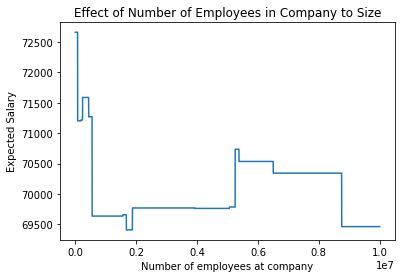

In [11]:
size_effect(X, regr)

## Effects of State on salary

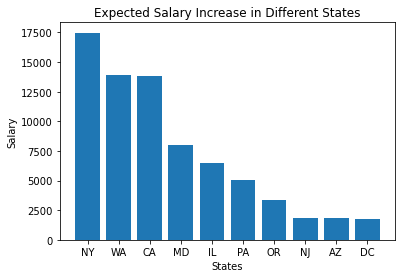

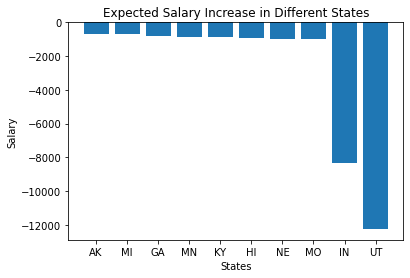

In [12]:
state_effects(X, regr, pred_sal)
state_effects(X, regr, pred_sal, top=False)

## Effects of qualifications on salary

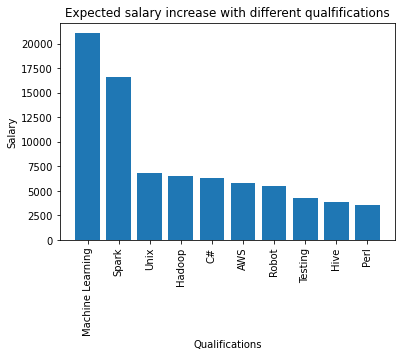

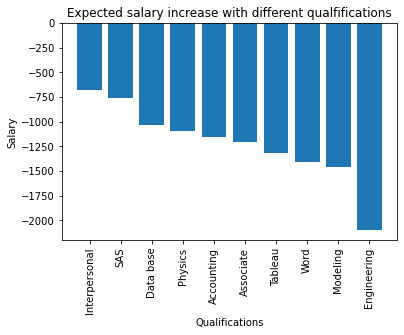

In [13]:
qualifications_effects(X, regr, pred_sal)
qualifications_effects(X, regr, pred_sal, top=False)